## Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Input, Dense, LSTM, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## Creating the training dataset

In [2]:
df = pd.read_csv('WHO-COVID-19-global-data (1).csv')
df_new = df[df[' Country'] == 'India']
df_new.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
13327,2020-01-30,IN,India,SEARO,1,1,0,0
13328,2020-01-31,IN,India,SEARO,0,1,0,0
13329,2020-02-01,IN,India,SEARO,0,1,0,0
13330,2020-02-02,IN,India,SEARO,1,2,0,0
13331,2020-02-03,IN,India,SEARO,1,3,0,0


In [3]:
y_tot = df_new[' New_cases'].values
y_tot.shape

(181,)

In [4]:
data_train = np.array(y_tot)
X_train = []
Y_train = []

for i in range(7, len(data_train)-6):
    X_train.append(data_train[i-7:i])
    Y_train.append(data_train[i:i+7])

In [5]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train.shape
Y_train.shape
pd.DataFrame(X_train)

,0,1,2,3,4,5,6
0,1,0,0,1,1,0,0
1,0,0,1,1,0,0,0
2,0,1,1,0,0,0,0
3,1,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
163,27114,28637,28701,28498,29429,32695,34956
164,28637,28701,28498,29429,32695,34956,34884
165,28701,28498,29429,32695,34956,34884,38902
166,28498,29429,32695,34956,34884,38902,40425


## Scaling and Transforming the data

In [6]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
Y_train = scaler.fit_transform(Y_train)
X_train.shape

(168, 7)

In [7]:
X_train = X_train.reshape(168, 7, 1)

## Constructing the model

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(60, activation = 'relu', input_shape=(7, 1))) 
model.add(tf.keras.layers.Dense(7))
model.compile(loss = 'mse', optimizer='adam')

In [9]:
model.fit(X_train, Y_train, epochs=100)

Epoch 1/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0819
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0744
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.0662
Epoch 4/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0595
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0425
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0331
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0230
Epoch 9/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0133
Epoch 10/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0066
Epoch 11/100
6/6 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 12/100
6/6 [==============================] - 0s 4ms/step - loss: 0.0025
Epoch 13/100
6/6 [==============================] - 0s 4ms/st

6/6 [==============================] - 0s 6ms/step - loss: 3.5796e-04


## Predictions

In [10]:
X_test = list(y_tot[-7:])
X_test = np.array(X_test)
X_test = X_test.reshape(7, 1)
X_test = scaler.fit_transform(X_test)
X_test = X_test.reshape(1, 7, 1)

In [11]:
pred = model.predict(X_test)
pred

array([[0.6989436 , 0.6479571 , 0.6546263 , 0.6452701 , 0.73260045,
        0.67090505, 0.72151846]], dtype=float32)

In [12]:
y_true = scaler.inverse_transform(pred)
list(y_true.astype(int)[0])

[46256, 45633, 45715, 45600, 46666, 45913, 46531]

In [13]:
y_tot[-7:]

array([37724, 45720, 49310, 48916, 48661, 49931, 47703])

## Graph

In [14]:
X = df_new['Date_reported'].values
X.shape
Y = df_new[' New_cases'].values

In [15]:
X_pred = ['2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01', '2020-08-02', '2020-08-03', '2020-08-04']
Y_pred = list(y_true.astype(int)[0])

<ipython-input-16-a59a2c556efa>:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111)


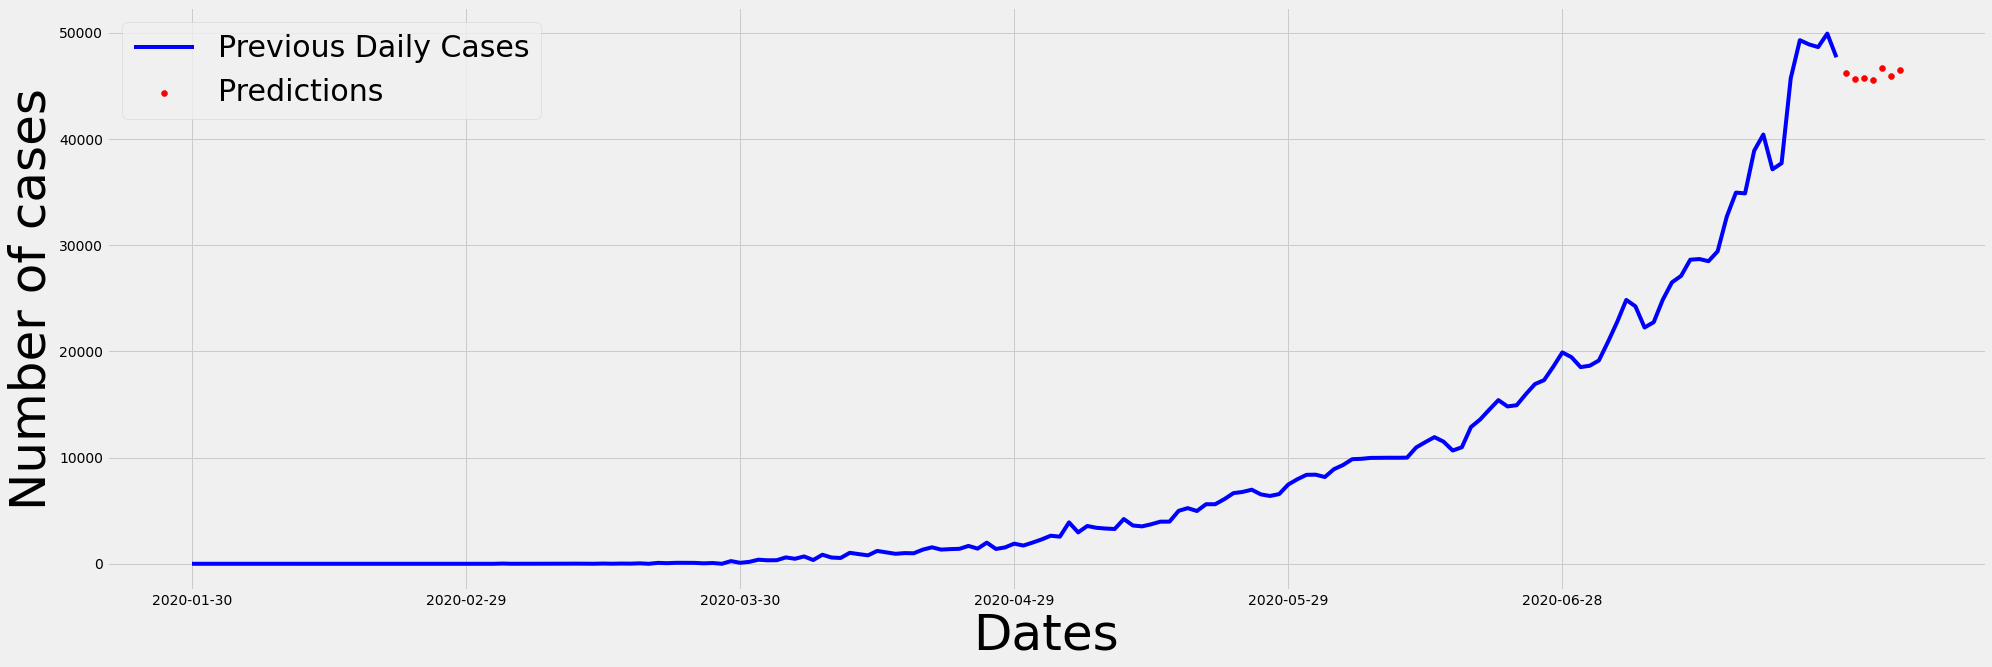

In [16]:
%matplotlib inline
#Xticks
xs = []
for i in range(156):
    if i%30==0:
        xs.append(X[i])
plt.style.use('fivethirtyeight')
plt.figure(figsize = (30,10))
plt.xlabel('Dates', fontsize =50)
plt.ylabel('Number of cases', fontsize =50)
plt.subplot(111)
plt.plot(X, Y, label = 'Previous Daily Cases', color = 'blue')
plt.scatter(X_pred, Y_pred, label = 'Predictions', color = 'red')
plt.grid(True)
plt.xticks(xs)
plt.xlabel('Dates')
plt.ylabel('Number of cases')
plt.legend(fontsize = 30)
plt.show()